In [1]:
# Importing Libraries

import re
import pandas as pd

In [2]:
# Reading the File

review = pd.read_csv("rottenTom.csv")

In [16]:
# Reviewing the Data

review.head()

rotten_tomatoes_link       critic_name  top_critic           publisher_name  \
3            m/0814255      Ben McEachen       False  Sunday Mail (Australia)   
6            m/0814255      Nick Schager       False           Slant Magazine   
7            m/0814255  Bill Goodykoontz        True         Arizona Republic   
8            m/0814255    Jordan Hoffman       False                      UGO   
9            m/0814255      Jim Schembri        True      The Age (Australia)   

  review_type review_score review_date  \
3       Fresh        3.5/5  09-02-2010   
6      Rotten       01-Apr  10-02-2010   
7       Fresh        3.5/5  10-02-2010   
8       Fresh            B  10-02-2010   
9       Fresh       03-May  10-02-2010   

                                      review_content  
3  Whether audiences will get behind The Lightnin...  
6  Harry Potter knockoffs don't come more transpa...  
7  Percy Jackson isn't a great movie, but it's a ...  
8                         Fun, brisk and imaginative  
9  Crammed with dragons, set-destroying fights an...

In [17]:
# Converting the column to string
review=review.dropna()
df = review['review_content'].to_string(header=False,index=False)

In [18]:
# Data Cleaning

df_review = re.sub(re.compile('<.*?>'), '', df) #removing HTML tags
df_review = re.sub('[^A-Za-z0-9]+', ' ', df_review) #taking only words

print(df_review)

Whether audiences will get behind The Lightning Harry Potter knockoffs don t come more transpar Percy Jackson isn t a great movie but it s a g Fun brisk and imaginative Crammed with dragons set destroying fights and This action packed fantasy adventure based on For what it is and for whom it is intended it Chris Columbus returns to his comfort zone for The best thing you can say about Chris Columbus This cast is simply too generic None of the yo Percy Jackson may not be Harry Potter good b Admirably the movie isn t bogged down in the e The main thing this movie seems to be missing i Imperfect yes but also both suitably imaginat Although the standard allegorical bases for myt A little bit worse than lifeless it s clueless You don t even have to be familiar with the fir This is generic filmmaking at its most banal a Kids may well enjoy the adventures of The Light An attempt to steal some of Harry Potter s thun With great effects and a few surprises it s a While this might not rival the l

In [19]:
# Lowercase

df_review = df_review.lower()


In [20]:
# Tokenization

import nltk

from nltk.tokenize import word_tokenize

tokens = nltk.word_tokenize(df_review)

In [22]:
# Stop words removal


from nltk.corpus import stopwords

stop_words = stopwords.words('english')

filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

print(filtered_review)

['whether', 'audiences', 'get', 'behind', 'lightning', 'harry', 'potter', 'knockoffs', 'come', 'transpar', 'percy', 'jackson', 'great', 'movie', 'g', 'fun', 'brisk', 'imaginative', 'crammed', 'dragons', 'set', 'destroying', 'fights', 'action', 'packed', 'fantasy', 'adventure', 'based', 'intended', 'chris', 'columbus', 'returns', 'comfort', 'zone', 'best', 'thing', 'say', 'chris', 'columbus', 'cast', 'simply', 'generic', 'none', 'yo', 'percy', 'jackson', 'may', 'harry', 'potter', 'good', 'b', 'admirably', 'movie', 'bogged', 'e', 'main', 'thing', 'movie', 'seems', 'missing', 'imperfect', 'yes', 'also', 'suitably', 'imaginat', 'although', 'standard', 'allegorical', 'bases', 'myt', 'little', 'bit', 'worse', 'lifeless', 'clueless', 'even', 'familiar', 'fir', 'generic', 'filmmaking', 'banal', 'kids', 'may', 'well', 'enjoy', 'adventures', 'light', 'attempt', 'steal', 'harry', 'potter', 'thun', 'great', 'effects', 'surprises', 'might', 'rival', 'later', 'better', 'ha', 'percy', 'jackson', 'oly

In [23]:
# Stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_review = [stemmer.stem(word) for word in filtered_review]

print(stemmed_review[0:10])

['whether', 'audienc', 'get', 'behind', 'lightn', 'harri', 'potter', 'knockoff', 'come', 'transpar']


In [24]:
# Lemmatization
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]

print(lemm_review)

['whether', 'audience', 'get', 'behind', 'lightning', 'harry', 'potter', 'knockoff', 'come', 'transpar', 'percy', 'jackson', 'great', 'movie', 'g', 'fun', 'brisk', 'imaginative', 'crammed', 'dragon', 'set', 'destroying', 'fight', 'action', 'packed', 'fantasy', 'adventure', 'based', 'intended', 'chris', 'columbus', 'return', 'comfort', 'zone', 'best', 'thing', 'say', 'chris', 'columbus', 'cast', 'simply', 'generic', 'none', 'yo', 'percy', 'jackson', 'may', 'harry', 'potter', 'good', 'b', 'admirably', 'movie', 'bogged', 'e', 'main', 'thing', 'movie', 'seems', 'missing', 'imperfect', 'yes', 'also', 'suitably', 'imaginat', 'although', 'standard', 'allegorical', 'base', 'myt', 'little', 'bit', 'worse', 'lifeless', 'clueless', 'even', 'familiar', 'fir', 'generic', 'filmmaking', 'banal', 'kid', 'may', 'well', 'enjoy', 'adventure', 'light', 'attempt', 'steal', 'harry', 'potter', 'thun', 'great', 'effect', 'surprise', 'might', 'rival', 'later', 'better', 'ha', 'percy', 'jackson', 'olympian', 's

In [25]:
import pandas as pd
import sklearn as sk
import math 

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

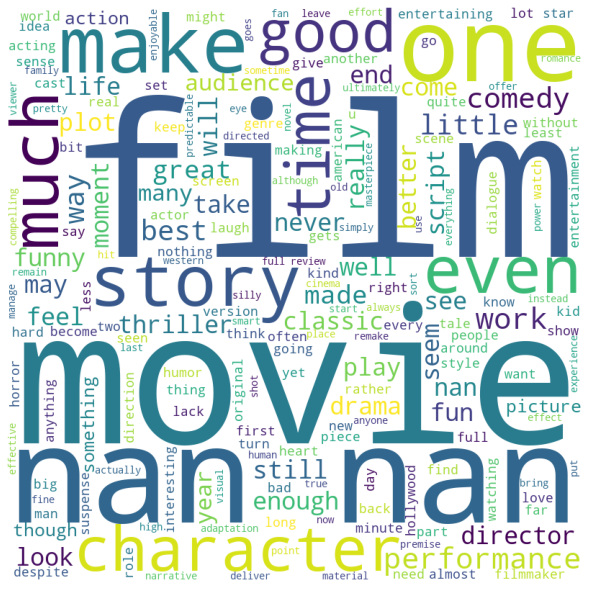

In [15]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
df = pd.read_csv("rottenTom.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.review_content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [13]:
from textblob import TextBlob
import nltk
blob = TextBlob(df_review[:51400])
print(blob.tags) 
print(blob.noun_phrases)
for sentence in blob.sentences:
    print(sentence.sentiment)



[('whether', 'IN'), ('audiences', 'NNS'), ('will', 'MD'), ('get', 'VB'), ('behind', 'IN'), ('the', 'DT'), ('lightning', 'NN'), ('harry', 'NN'), ('potter', 'NN'), ('knockoffs', 'NNS'), ('don', 'VBP'), ('t', 'JJ'), ('come', 'VBP'), ('more', 'RBR'), ('transpar', 'JJ'), ('percy', 'NN'), ('jackson', 'NN'), ('isn', 'NN'), ('t', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('movie', 'NN'), ('but', 'CC'), ('it', 'PRP'), ('s', 'VBZ'), ('a', 'DT'), ('g', 'NN'), ('fun', 'NN'), ('brisk', 'NN'), ('and', 'CC'), ('imaginative', 'JJ'), ('crammed', 'NN'), ('with', 'IN'), ('dragons', 'NNS'), ('set', 'VBP'), ('destroying', 'VBG'), ('fights', 'NNS'), ('and', 'CC'), ('this', 'DT'), ('action', 'NN'), ('packed', 'VBD'), ('fantasy', 'JJ'), ('adventure', 'NN'), ('based', 'VBN'), ('on', 'IN'), ('for', 'IN'), ('what', 'WP'), ('it', 'PRP'), ('is', 'VBZ'), ('and', 'CC'), ('for', 'IN'), ('whom', 'WP'), ('it', 'PRP'), ('is', 'VBZ'), ('intended', 'VBN'), ('it', 'PRP'), ('chris', 'VB'), ('columbus', 'JJ'), ('returns', 'NNS')

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
print(sent_analyzer.polarity_scores(df_review[:51400]))

{'neg': 0.111, 'neu': 0.701, 'pos': 0.188, 'compound': 1.0}
